In [22]:
import pandas as pd
df=pd.read_csv("diabetes.csv")
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [3]:
df.shape

(768, 9)

In [4]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
#predictions
rfc_predict=rfc.predict(x_test)
rfc_predict

C:\Users\APSSDC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [11]:
#evaluating performance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
rfc_cv_score=cross_val_score(rfc,x,y,cv=10,scoring='roc_auc')

In [14]:

print("==confusion Matrix==>")
print(confusion_matrix(y_test,rfc_predict))
print("\n")
print("==Classification Report==>")
print("\n")
print(classification_report(y_test,rfc_predict))
print("==All AUC Score ==>")
print(rfc_cv_score)
print("\n")
print("==Mean AUC Score-Random Forest==>")
print(rfc_cv_score.mean())

==confusion Matrix==>
[[154  17]
 [ 46  37]]


==Classification Report==>


              precision    recall  f1-score   support

           0       0.77      0.90      0.83       171
           1       0.69      0.45      0.54        83

    accuracy                           0.75       254
   macro avg       0.73      0.67      0.69       254
weighted avg       0.74      0.75      0.74       254

==All AUC Score ==>
[0.77666667 0.8237037  0.80666667 0.71407407 0.76740741 0.8237037
 0.83074074 0.91518519 0.77153846 0.81730769]


==Mean AUC Score-Random Forest==>
0.8046994301994301


In [16]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(100,500,num=11)]
max_depth.append(None)
random_grid={'n_estimators': n_estimators,'max_features': max_features,'max_depth':max_depth}
rfc_random=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)
rfc_random.fit(x_train,y_train)
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.4min finished


{'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': 380}


In [18]:
rfc = RandomForestClassifier(n_estimators=600, max_depth=380, max_features='sqrt')
rfc.fit(x_train,y_train)
rfc_predict = rfc.predict(x_test)
rfc_cv_score = cross_val_score(rfc, x, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[147  24]
 [ 40  43]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       171
           1       0.64      0.52      0.57        83

    accuracy                           0.75       254
   macro avg       0.71      0.69      0.70       254
weighted avg       0.74      0.75      0.74       254



=== All AUC Scores ===
[0.78518519 0.82518519 0.82111111 0.73481481 0.81851852 0.86481481
 0.86925926 0.90888889 0.80692308 0.85692308]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8291623931623932


In [20]:
rfc.predict([[10,101,76,48,118,32.9,0.171,63]])

array([0], dtype=int64)

## Voting Classifier

In [23]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier


In [24]:
log_clf=LogisticRegression()
rnd_clf=RandomForestClassifier()

In [27]:
x,y=make_moons(n_samples=100,noise=0.15,random_state=0)
x

array([[-3.22140161e-02,  9.91183435e-01],
       [ 1.89369937e+00, -1.43260983e-01],
       [ 9.37139867e-01,  2.60605533e-02],
       [-2.09992548e-03,  7.37796614e-02],
       [ 9.30798303e-01, -5.19403855e-01],
       [ 2.01988692e+00,  3.93408264e-01],
       [ 5.44042634e-01,  5.96292060e-01],
       [ 9.28075755e-01, -6.24226911e-01],
       [ 1.74199561e-03,  3.19609386e-01],
       [ 1.84154522e+00,  3.03519978e-01],
       [-1.30194649e-01,  4.61523379e-01],
       [ 1.95220698e+00, -1.21516672e-01],
       [ 1.36130855e+00, -6.10645836e-01],
       [ 9.48854620e-01,  9.69104083e-01],
       [ 6.84138531e-01,  4.90457831e-01],
       [-3.55948639e-01,  1.02909238e+00],
       [ 2.30422245e-01,  1.11016938e+00],
       [ 1.68179520e-01,  9.11612785e-01],
       [-3.77758742e-01,  8.16951549e-01],
       [ 1.01735851e+00,  5.21809968e-01],
       [-7.61970461e-01,  5.16251552e-01],
       [ 3.72609000e-01, -1.95418424e-01],
       [ 8.33035136e-01,  4.72017740e-01],
       [ 7.

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [29]:
voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf)],voting='hard')
voting_clf.fit(x_train,y_train)

C:\Users\APSSDC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\APSSDC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                           

In [30]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,voting_clf):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.85
RandomForestClassifier 0.95
VotingClassifier 0.95


C:\Users\APSSDC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\APSSDC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\APSSDC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=10,bootstrap=True,n_jobs=-1)
bag_clf


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [32]:
bag_clf.fit(x_train,y_train)
y_pred=bag_clf.predict(x_test)

## Supported vector machine

In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv("cancer.csv")
data.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60      2019.0   
1         0.1812  ...          23.41           158.80      1956.0   
2         0.2069  ...          25.53           152.50      1709.0   
3         0.2597  ...          26.50            98.87       567.7   
4         0.1809  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  diagnosis  
0          0.4601                  0.11890          M  
1          0.2750                  0.08902          M  
2          0.3613                  0.08758          M  
3          0.6638                  0.17300          M  
4          0.2364                  0.07678          M  

[5 rows x 32 columns]

In [8]:
x = data.iloc[:,1:31].values
y = data.iloc[:,31].values
print("cancer data set dimentions:{}".format(data.shape))
print(data.groupby("diagnosis").size())

cancer data set dimentions:(569, 32)
diagnosis
B    357
M    212
dtype: int64


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

diagnosis
B    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
M    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
dtype: object

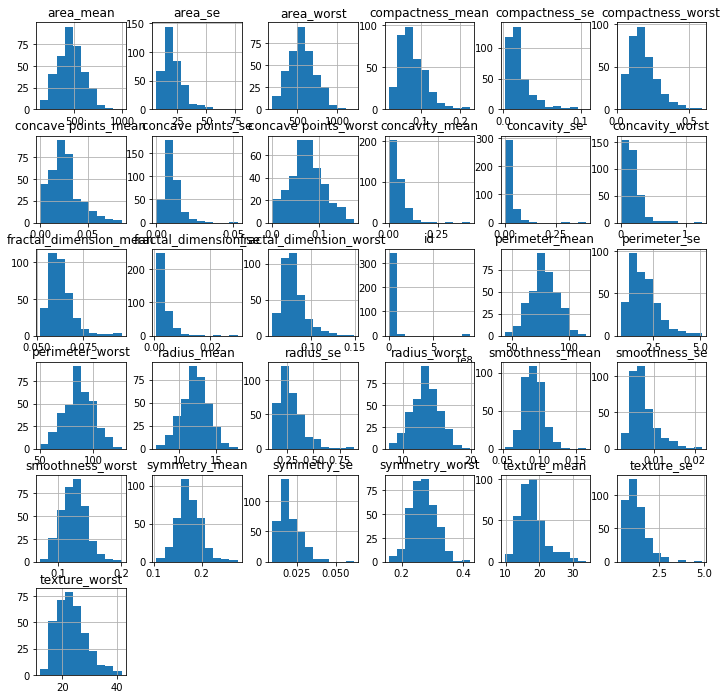

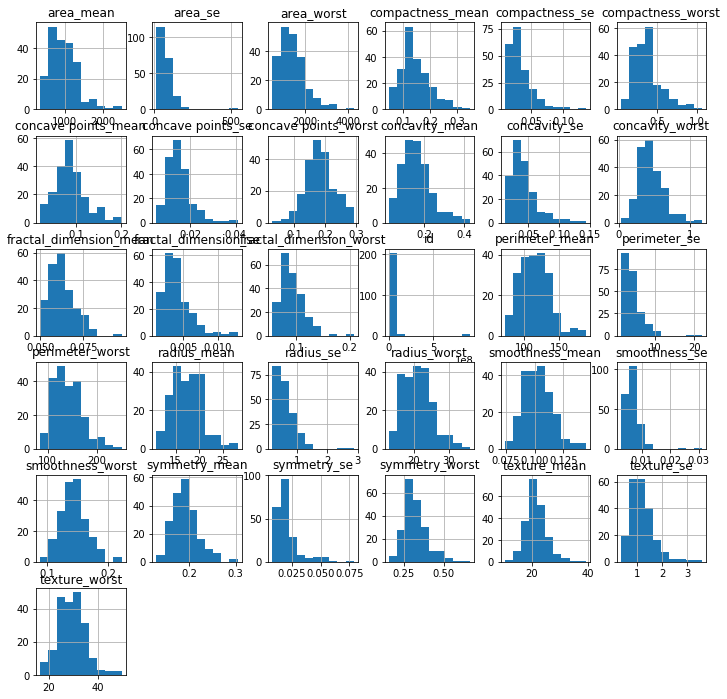

In [49]:
import matplotlib.pyplot as plt
data.groupby('diagnosis').hist(figsize=(12,12))

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
y=labelencoder_Y.fit_transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
x_test

array([[1.469e+01, 1.398e+01, 9.822e+01, ..., 1.108e-01, 2.827e-01,
        9.208e-02],
       [1.317e+01, 1.866e+01, 8.598e+01, ..., 2.088e-01, 3.900e-01,
        1.179e-01],
       [1.295e+01, 1.602e+01, 8.314e+01, ..., 1.056e-01, 3.380e-01,
        9.584e-02],
       ...,
       [1.505e+01, 1.907e+01, 9.726e+01, ..., 1.120e-01, 2.282e-01,
        6.954e-02],
       [1.940e+01, 2.350e+01, 1.291e+02, ..., 1.564e-01, 2.920e-01,
        7.614e-02],
       [1.189e+01, 2.117e+01, 7.639e+01, ..., 8.263e-02, 3.075e-01,
        7.351e-02]])

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_test)

[[ 0.15850234 -1.23049032  0.25369143 ... -0.05738582 -0.08689656
   0.48863884]
 [-0.2638036  -0.15450952 -0.23961754 ...  1.41330744  1.77388495
   2.02105229]
 [-0.32492682 -0.76147305 -0.35407811 ... -0.1354226   0.87210827
   0.71179432]
 ...
 [ 0.25852216 -0.06024625  0.21500053 ... -0.03937733 -1.03202789
  -0.84910706]
 [ 1.46709506  0.95825694  1.49824869 ...  0.62693676  0.07438274
  -0.45739797]
 [-0.61942964  0.42256565 -0.6261235  ... -0.48013509  0.34318156
  -0.6134881 ]]


In [61]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear",random_state=0)
print(classifier.fit(x_train,y_train))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


In [62]:
y_predict=classifier.predict(x_test)
y_predict

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0])

In [63]:
#Evaluating Performance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
print("==confusion Matrix==>")
conff=confusion_matrix(y_test,y_predict)
print(conff)
print("\n")
c=print(conff[0,1]+conff[1,0])#FP(false+ve) and FN(False-ve)
print(conff[0,0]+conff[1,1])#True +ve and True _ve
from sklearn.metrics import accuracy_score
print("Acuuracy:",accuracy_score(y_test,y_predict)*1)


==confusion Matrix==>
[[71  1]
 [ 3 39]]


4
110
Acuuracy: 0.9649122807017544
